Part 1 : Data Preperation 

1.1 Load Libraries and Data 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

#laods the csv file with the data 
df = pd.read_csv('/Users/anisa/Documents/Stats CW2/tx19_bridges_sample.csv')

#show first few rows to confirm data is being processed
df.head()

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200


1.2 Derive the Age Variable and Filter Bridges

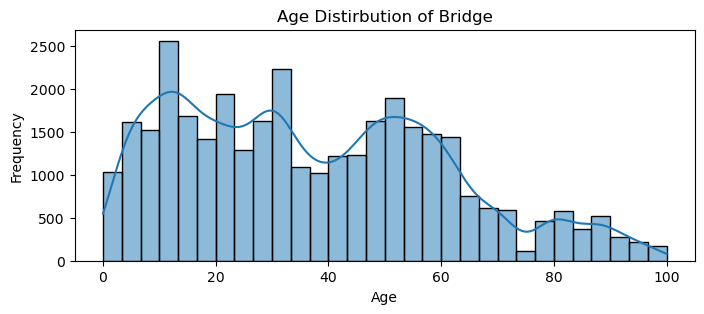

In [11]:
#intitialise variables
#anlysis year based on the maximum year 
analysis_year= df['Year'].max()

#calculate age variable 
df['Age']= analysis_year -df ['Year']

#exclude Bridges older than 100 years
df= df[df['Age']<=100].copy()

#display header(fist few rows)
df[['Year','Age']].head()

#plot a histogram showing these results
plt.figure(figsize=(8,3))
sns.histplot(df['Age'], bins=30, kde= True)
plt.title( 'Age Distirbution of Bridge')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Figure 1: is a histogram illustrating the distribution of bridge ages from the dataset. It is also showing the range and frequency across the dataframe given. By calculating the age of each bridge excluding those over 100 yeard old, we are able to focus on more current and relevant maintenance. It shows that as the 'Age' increases the freqeuncy decreaces.


In [13]:
# set a minimum count 
threshold=100

material_counts=df['Material'].value_counts()
design_counts= df['Design'].value_counts()

#apply threshold to simplify category to both categroies
#reduce the material categories as 'Combined materials'
df['Material'] = df['Material'].apply(lambda x: x if pd.notna(x) and df['Material'].value_counts()[x] > threshold else 'Material Categories Simplified')

#reduce the design categories as 'Combined designs'
df['Design'] = df['Design'].apply(lambda x: x if pd.notna(x) and df['Design'].value_counts()[x]> threshold else 'Design Categories Simplified')

#confirm reduction 
#print result output 
print("Material\n", df['Material'].value_counts())
print("Design\n", df['Design'].value_counts())


Material
 Material
Concrete                          27092
Steel                              6606
Timber                              465
Material Categories Simplified       59
Name: count, dtype: int64
Design
 Design
Beam                            28301
Slab                             4333
Other                            1244
Arch                              141
Truss                             117
Design Categories Simplified       86
Name: count, dtype: int64


1.3 Simplify Material and Design Categories

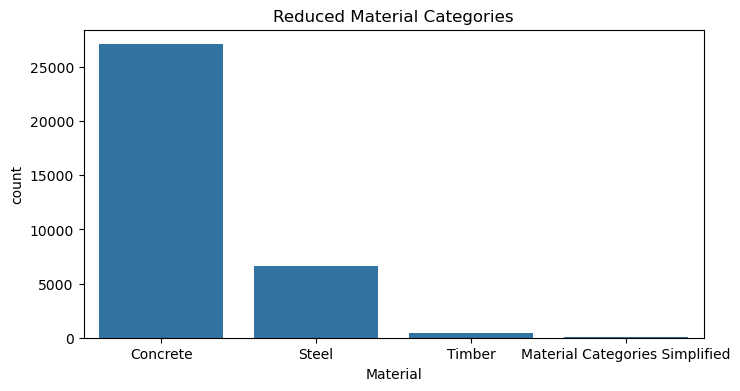

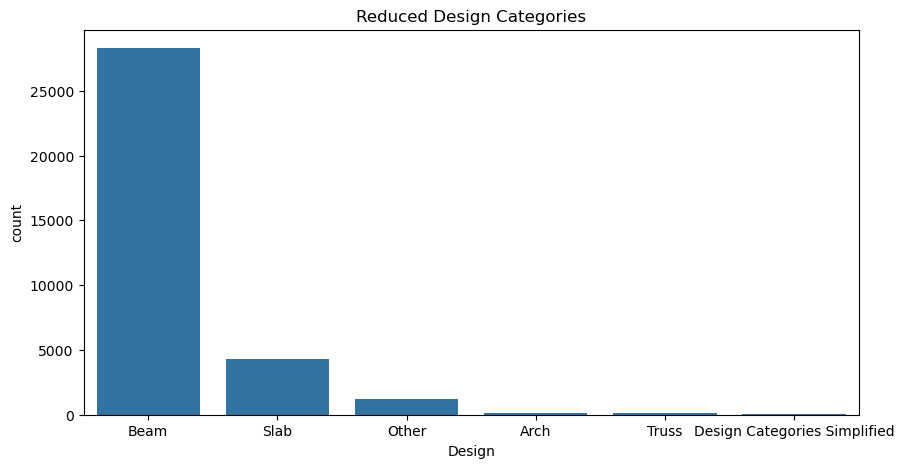

In [15]:
#plot the simplified categories for 'Material'
plt.figure(figsize =(8,4))
sns.countplot( data=df,x='Material', order=df['Material'].value_counts().index)
plt.title('Reduced Material Categories')
plt.show()

#plot the simplified categories for 'Design'
plt.figure(figsize=(10,5))
sns.countplot( data=df, x='Design', order=df['Design'].value_counts().index)
plt.title ('Reduced Design Categories')
plt.show()


Figure 2: shows two bar charts which represent the 'Material' and 'Design' categories and their reduced versions. Material with fewer than 100 currencies were combined and grouped as simplified categories. This was we can focus on the more prodominantly used materials and designs and see their impacts on the conditions of the bridges in futher anlysis.




1.4 Derive Condition Score 

In [27]:
#set categories for rating map scores from the data 
rating_map = {'Failed':0, 'Poor':1, 'Fair':2, 'Good':3, 'Very Good':4}

#set the scores from rating map to the variables
df['Deck_score']= df['Deck_rating'].map(rating_map)
df['Superstr_score']= df['Superstr_rating'].map(rating_map)
df['Substr_score']= df['Substr_rating'].map(rating_map)

#create condition score using scores of the varibales
df['Condition_Score'] = df['Deck_score'] + df['Superstr_score']+ df['Substr_score']

#display the first few rows of the condition scores 
df[['Deck_score', 'Superstr_score', 'Substr_score', 'Condition_Score']].head()



,Deck_score,Superstr_score,Substr_score,Condition_Score
0,3.0,4.0,4.0,11.0
1,3.0,3.0,4.0,10.0
2,4.0,4.0,4.0,12.0
3,3.0,3.0,1.0,7.0
4,3.0,4.0,4.0,11.0


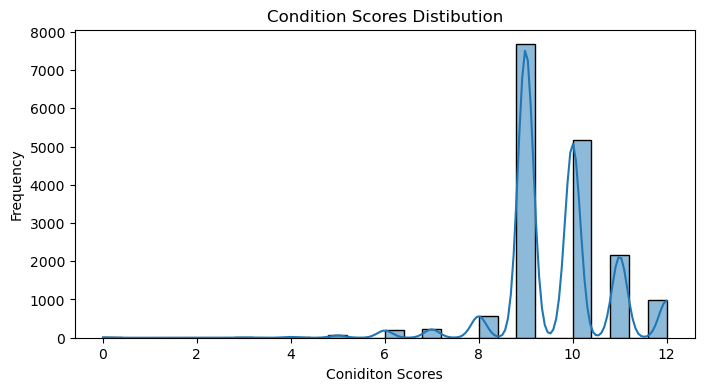

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['Condition_Score'], bins=30, kde=True)
plt.title('Condition Scores Distibution')
plt.xlabel('Coniditon Scores')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#add comments for condition scores here before i finish this 

Part 2: Exploratory Analysis

2.1 Load Libraries and Data Preperation

In [25]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

#load the csv file
df = pd.read_csv('/Users/anisa/Documents/Stats CW2/tx19_bridges_sample.csv')

if 'Year' in df.columns:
    df['Age'] = 2024-df['Year']

2.2 Analyse Relationships Between Predictors and Target

Age vs Condition Score:


<Figure size 800x400 with 0 Axes>

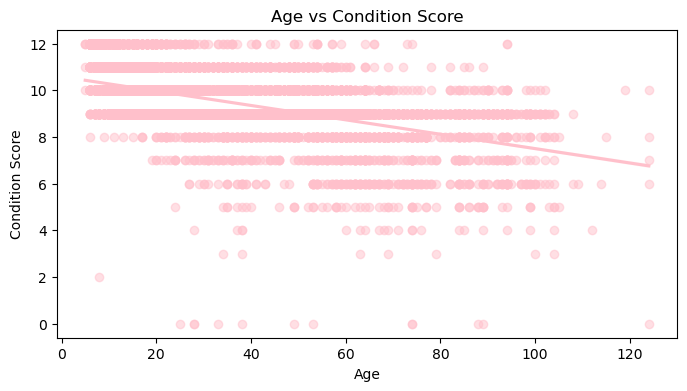

In [29]:
plt.figure(figsize=(8,4))
sns.regplot(x='Age', y='Condition_Score', data=df, scatter_kws={'alpha':0.5}, color='pink')
plt.title('Age vs Condition Score')
plt.xlabel('Age')
plt.ylabel('Condition Score')
plt.show()

Figure 4: this is a scatter plot with a regression line showing the relationship between bridge age and the conditon scores. In this graph as 'Age' increases, the 'Condition_Scores' decreaces as the regression shows a downwards slope. This suggests that older bridges have poorer conditions. This is a key finding for the Texas Department of Transportation as it shows that age is a significant predictor of bridge deterioration. Therefore older bridges need more inspection.

Average Daily vs Condition Score

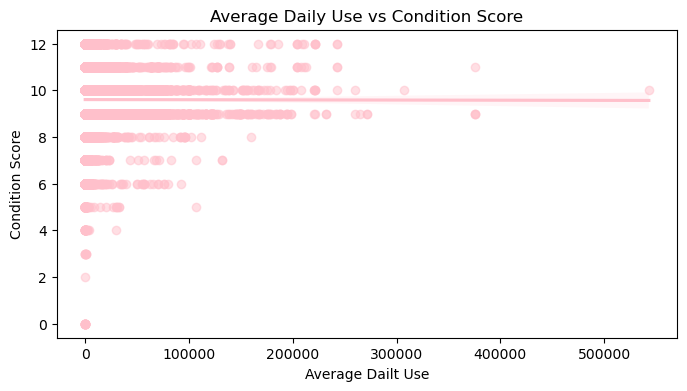

In [31]:
plt.figure(figsize=(8,4))
sns.regplot(x='AverageDaily', y='Condition_Score', data=df, scatter_kws={'alpha':0.5}, color='pink')
plt.title ('Average Daily Use vs Condition Score')
plt.xlabel('Average Dailt Use')
plt.ylabel('Condition Score')
plt.show()


Figure 5: this shows a scatter plot illustrating the relationship between 'Average Daily Use' and 'Condition Scores. The minimal slope of the regression line suggests that the number of vehicles crossing the bridge daily have little influence on the bridges conditon. This is important as the Texas Department of Transportation can conclude from this gragh that the traffic volume is not a key factor. This also shows that other variables need to be investigated further and resources can be allocated to other predictors as daily use does not contribute highly to the bridges deterioration.

Trucks_percent vs Condition Score

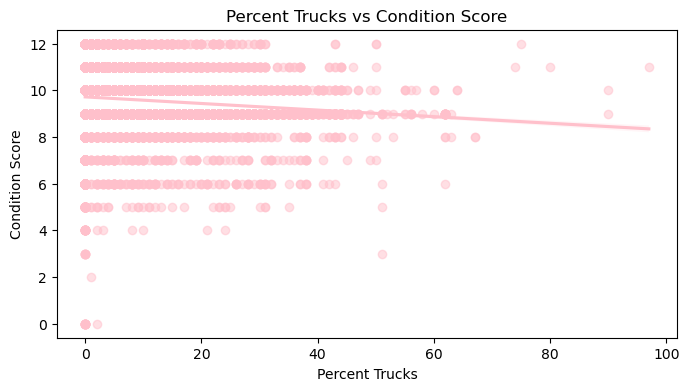

In [33]:
plt.figure(figsize=(8,4))
sns.regplot(x='Trucks_percent', y='Condition_Score', data=df, scatter_kws={'alpha':0.5}, color='pink')
plt.title('Percent Trucks vs Condition Score')
plt.xlabel('Percent Trucks')
plt.ylabel('Condition Score')
plt.show()



Figure 6: this is a scattor plot of 'Trucks_percent' vs 'Condition_Scores'. This illustration does not have a significant correlation. This is seen from the minimal slope of the regression line. The proportion of trucks using this bridge does not contribute to the condition score as much as other variables such as the bridges age. This is a key findiing as the department can conclude that truck traffic is not a high factor or focus for maintenance planning. 

Material vs Condition Score 

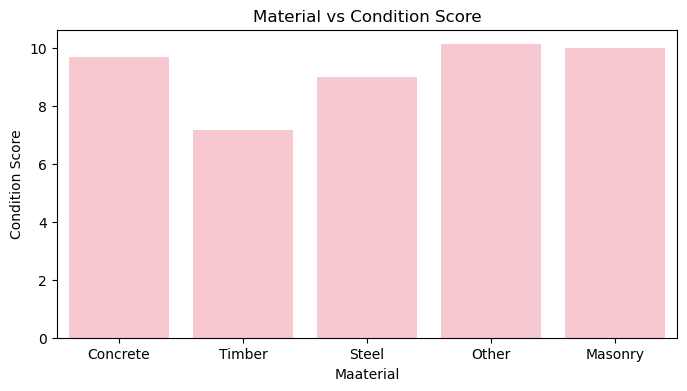

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x='Material', y='Condition_Score', data=df, errorbar=None, color='pink')
plt.title('Material vs Condition Score')
plt.xlabel ('Maaterial')
plt.ylabel('Condition Score')
plt.show()


Figure 7: this is a bar chart showing the average condtiton scores for bridges made from different materials. Overall the materials used on the gragh do not contribute negatively to the conditon scores. However 'Concrete' bridges generally have higher condtiton scores than those made from 'Timber'. This shows that concrete materials have higher durability and shows the Texas Deprtment that they should invest less in 'Timber' materials in the future. 

Design vs Condition Score

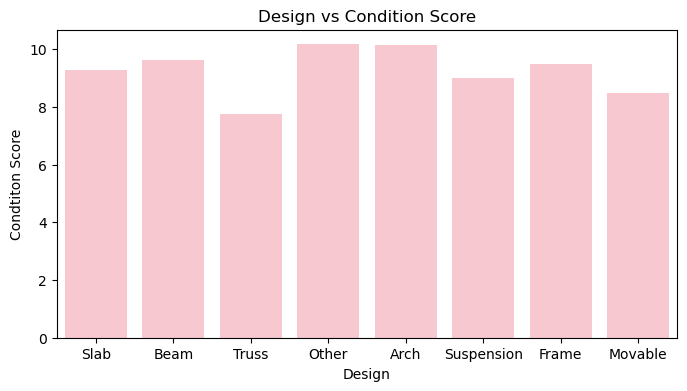

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(x='Design', y='Condition_Score', data=df, errorbar=None, color='pink')
plt.title('Design vs Condition Score')
plt.xlabel('Design')
plt.ylabel('Condtiton Score')
plt.show()


Figure 8: this is a bar chart illustrating the condition scores against the different bridge designs. Similar to the results for 'Materials' there is not a significant difference in condtition scores between the different designs. However the 'Arch' design has a higher condition score than the 'Truss' design. This shows that although the bridge deisgn is not a significant factor towards predicting the condition score, the Texas Department of Transportation should invest in less 'Truss' designs compared to 'Arch' and 'Beam' designs.

Correlation Matrix for Continous Variables

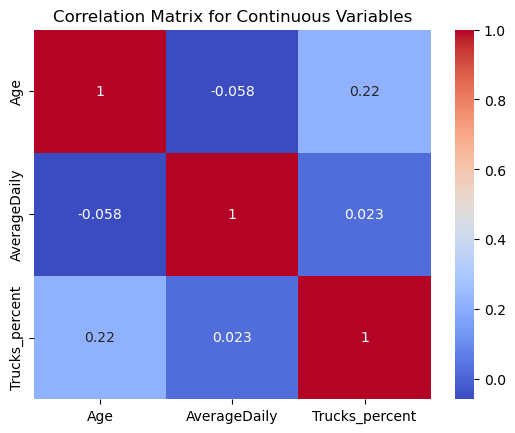

In [39]:
con_variables= ['Age', 'AverageDaily', 'Trucks_percent']
correlation_matrix =df[con_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

Figure 9: This is a correlation matrix showing the relationships between the continuous variables: 'Age', 'AverageDaily' and 'Trucks_percent'. The correlation coefficients range from -1 to 1, this shows the strength and direction of the relationships.

1. Age and AverageDaily - The correlation coefficient is -0.057 which is close to 0. This shows a negative relationship between the two variables and suggests that the age of the bridge has very little impact on the average daily use.
2. Age and Trucks_percent - the correlation coefficient is 0.22 which indications a very weak positive relationship. This also suggests that as the age increaces there is a slight increase in the propotion of trucks.
3. AverageDaily and Trucks_percent - The correlation coefficient is 0.023 which is also close to 0 but is also slightly positive. This means the amount of daily traffic has little influence on the proportion of trucks.

These findings are important to the Texas Department of Transportation as the low correlation values indicate that these predicting variables are independent of each other. This means that each variable can be used in predictions without the concerns of redundancy which ensures reliable results. The department can focus on each variable as independent and not as complementary factors affeting bridge conditions. However between the predictors Age does have more predictive power as its coefficent is slightly negative and so that can be the departments primary focus.

To conclude the relationships between the continuous variables have little effect to the condition scores of the bridges. However 'Age' against 'AverageDaily' shows a more significant relationship compared to the other variables. Overall the 'Age' and 'Material' variables have shown to have more significant impacts on the condition scores of the bridges so far.

Note: please see under each figure for more in depth comments on what the trends with each predictor variable represents and how they are significant findings to the Texas Department of Transportation.

Part 3: Regression Modelling

3.1 Load Data and Libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt 

#load the csv file for clarification again
df = pd.read_csv('/Users/anisa/Documents/Stats CW2/tx19_bridges_sample.csv')

#redifine the condition scores so cell can run
rating_map = {'Failed':0, 'Poor':1, 'Fair':2, 'Good':3, 'Very Good':4}
df['Deck_score']= df['Deck_rating'].map(rating_map)
df['Superstr_score']= df['Superstr_rating'].map(rating_map)
df['Substr_score']= df['Substr_rating'].map(rating_map)
df['Condition_Score'] = df['Deck_score'] + df['Superstr_score']+ df['Substr_score']

#anlysis year based on the maximum year 
analysis_year= df['Year'].max()

#calculate age variable 
df['Age']= analysis_year -df ['Year']

df= df.dropna(subset=['Condition_Score']).copy()

#convert categorical variables 
df=pd.get_dummies(df, columns=['Material', 'Design'], drop_first = True)


3.2 Linear Regression Model Setup and R2 Calculation:

In [73]:
#define predictors and target variables 
x =np.column_stack((df['Age'], df['Trucks_percent'], df['AverageDaily'], df.filter(regex='Material_').values, df.filter(regex='Design_').values))
y= df['Condition_Score']

#set mask for rows without NAN in x and y values 
finite_mask = np.isfinite(y) & np.all(np.isfinite(x), axis=1)

#remove rwows with NAN
x =x[finite_mask]
y =y[finite_mask]

#split data into sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=42)

#set up linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

#set preditctions for y
y_pred =model.predict(x_test)

#calulculate R2 on test sets
r2 = model.score(x_test, y_test)
print(f"R2 : {r2:3f}. This represents the Coefficient of Determination.")
                   

R2 : 0.360108. This represents the Coefficient of Determination.


R2 - which is the coeffictient of determination vlaues, represents the proportion of variance in the condition score shown by this model. An R2 = 0.36(2dp) shows that 36.01 of the variability in the bridge condition scores can be explained by the proposed predictors. The remaning 63.99% is due to factos not included in this model. Therefore other predictor variables that have not been mentioned have more effcects and should be investigated.  

3.3 Analyse Residuals 

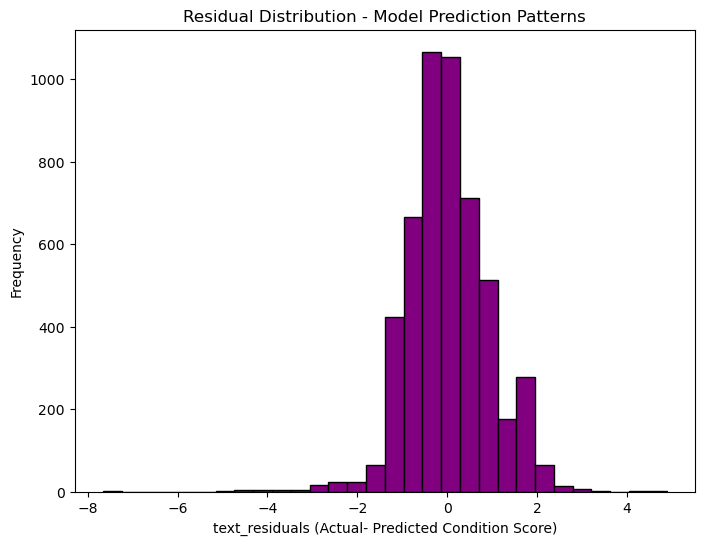

In [92]:
#calculate residuals
test_residuals = y_test - y_pred

#plot residuals
plt.figure(figsize=(8,6))
plt.hist(test_residuals, bins=30, color='purple', edgecolor='black')
plt.title('Residual Distribution - Model Prediction Patterns')
plt.xlabel('text_residuals (Actual- Predicted Condition Score)')
plt.ylabel('Frequency')
plt.show()


Figure 10: this gragh is a linear regression model showing the density distribution of the residuals which are erros between actual and predicted values. The values are mostly centred around zero showing the model does not have strong bias when predicting the condition score. It also suggests that there are little to no systematic erros in the prediction. The shape is fairly symmetrical which is desired and this indicates that the models erros are distributed equaly on both side. As there is no significant skew. The narrow spread of values show that the residuals range from -2 to 2. This indicates that the predictions are close to actual values and therefore accurate/reliable. 

3.4 Compare Regression Coefficients to Predictors

In [108]:
#summarise coefficients into a df to interpret 
coeff_summary= pd.DataFrame({
    'Predictor_Variables':['Age', 'Trucks_percent', 'AverageDaily'] +list(df.filter(regex='Material_').columns) + list(df.filter(regex='Design_').columns),
    'Coefficient_Value': model.coef_
})

#print the result output
print(coeff_summary)
                                                                          

   Predictor_Variables  Coefficient_Value
0                  Age          -0.030192
1       Trucks_percent          -0.004279
2         AverageDaily          -0.000002
3     Material_Masonry           0.864615
4       Material_Other           0.169895
5       Material_Steel          -0.669631
6      Material_Timber          -2.163800
7          Design_Beam          -0.745499
8         Design_Frame          -0.517292
9       Design_Movable          -0.992433
10        Design_Other          -0.541428
11         Design_Slab          -0.686012
12   Design_Suspension          -1.278416
13        Design_Truss          -0.793286


Assuming other factors remian constant, the coefficients reflect the expected change and influence on the condition score as per unit increased in each predictor. Some materials have negative values and some have positive values this shows how positively and negatively they influence the condtion score values. For example 'Material_Timber' has the lowest value of -2.16(2dp), this shows that this predictor variable has the highest negative affect on the condition score of the bridges. Therefore the condition score of bridges using a timber material would be expected to be lower than the other predictors.

3.5 Calculate Scaled Influence on Predictor Values


In [126]:
#define ranges for predictor variables 
range_age= df['Age'].quantile(0.9) - df ['Age'].quantile(0.1)
range_trucks_percentage =df['Trucks_percent'].quantile(0.9) - df['Trucks_percent'].quantile(0.1)
range_daily_usage = df['AverageDaily'].quantile(0.9) - df['AverageDaily'].quantile(0.1)
range_condition_score = df['Condition_Score'].quantile(0.9) - df['Condition_Score'].quantile(0.1)

#calculate scaled influence of each predictor based on their ranges
influence_age=100 * (model.coef_[0] * range_age / range_condition_score)
influence_trucks=100* (model.coef_[1] * range_trucks_percentage/ range_condition_score)
influence_daily= 100 * (model.coef_[2] * range_daily_usage / range_condition_score)

##print the output results (for sclaed influence percenatges of each predictor)
print(f'Scale Influence of Age: {influence_age:.2f}%')
print(f'Scale Influnce of Trucks_percent: {influence_trucks:.2f}%')
print(f'Scale Influence of AverageDaily: {influence_daily:.2f}%')





Scale Influence of Age: -73.97%
Scale Influnce of Trucks_percent: -4.71%
Scale Influence of AverageDaily: -2.38%


The scale influence percentages show that 'Age' had the most prodominent effect on the bridges condition with a highly negative percentage of -73.97%. This indicates that as the bridge ages their condition deteriorates significantly. Thefore 'age' is a critical factor to conition score based on their sclae influence. Although 'Trucks_percent' is only -4.71 it is still a negative score showing that as truck traffig increases there will be a slight decrease to the condition score of the bridge. The same goes for 'AverageDaily' whcih is -2.38% showing that there is minimal effect on the condition score but minor negative impacts may arise overtime. However 'Age' had the most influence on the condition score based on the scaled influence.

The scale influence results are backed up by the R2 results as 'Age' has a more negative value compared to the 'Truks_percent' and'AverageDaily' values. Therefore this further confirms that 'Age' had a higher impact on the condition scores.

The coefficient of determination(R2) of 36.01% shows that we do not have sufficient evidence to proivde the main predictive cause of the bridges condition as a high percentage (63.99%) is not accounted for.The current predictive values have moderate predictive power on the model. Additional variables should be investugated to be able to predict the bridge condtions more accurately.


Final argument

Based on the scaled influence, the Coefficent of Determination value (R2), the relationship between the continous and categorical variables, age distibution anlysis and rating map scores i can conclude that'Age' has the hgihest affect on the bridges condition score. It is also the primary driver of the bridge condition, therefore i would advise the Texas Department of Transportation to focus and invest in this variable the most. Such as exploring non-linear models as it may capture any complex relationships between age and bridge conditions.  And focus less on the designs of the bridge as that had the least affect based on the R2 values and their condition scores. More importanlty as already stated there are more variables outside of those investigated to be looked into as they account for 63.99% of the predictive power of the model. 